In [4]:
import os
import sys
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
os.chdir('/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('max_colwidth', 400)

# Check HiC-Pro and HiCCUPS Output Files for Pairs and Loop Information

#### read output logs helper functions

In [5]:
# for chr1 only
def read_hiccups_loop_files(file):
    loop_data = {}
    count = 0
    with open(file) as fr:
        for line in fr:
            if line.startswith('#'):
                continue
            else:
                info = line.strip().split()
                loop_info = info[0:6]
                loop_data[count] = loop_info
                count = count + 1
    return(loop_data)

In [6]:
def read_hicpro_stats_log(log):
    log_data = {}
    count = 0
    with open(log) as fr:
        for line in fr:
            if line.startswith('#'):
                continue
            else:
                info = line.strip().split()
                pair_info = info[0:2]
                log_data[count] = pair_info
                count = count + 1
    return(log_data)

#### generate data frame with loop and pairs info

In [63]:
def generate_loop_df():
    loop_data = []
    samples = glob.glob('results/loops/hiccups/whole_genome/*Homo*/')
    for fn in samples:
        
        sample_info = []
        sample_name = fn.split('/')[4]
        sample_info.append(sample_name)
        sample_info.append(sample_name.split(".")[3])
            
        file_path_mpairstat = "results/hicpro/{sn}/hic_results/stats/{sn}/{sn}.mpairstat".format(sn = sample_name)
        file_path_mergestat = "results/hicpro/{sn}/hic_results/stats/{sn}/{sn}_allValidPairs.mergestat".format(sn = sample_name)
        
        if os.path.exists(file_path_mpairstat):
            pairs_info = read_hicpro_stats_log(file_path_mpairstat)
            sample_info.append(int(pairs_info[0][1]))
        else:
            sample_info.append(int(0))
        if os.path.exists(file_path_mergestat):
            pairs_info = read_hicpro_stats_log(file_path_mergestat)
            sample_info.append(int(pairs_info[0][1]))
        else:
            sample_info.append(int(0))
        
        
        file_path5 = os.path.join(fn, "postprocessed_pixels_5000.bedpe")
        file_path10 = os.path.join(fn, "postprocessed_pixels_10000.bedpe")
        file_path25 = os.path.join(fn, "postprocessed_pixels_25000.bedpe")
            
        if os.path.exists(file_path5):
            loop_info = read_hiccups_loop_files(file_path5)
            sample_info.append(len(loop_info))
        else:
            sample_info.append(int(0))
        if os.path.exists(file_path10):
            loop_info = read_hiccups_loop_files(file_path10)
            sample_info.append(len(loop_info))
        else:
            sample_info.append(int(0))
        if os.path.exists(file_path25):
            loop_info = read_hiccups_loop_files(file_path25)
            sample_info.append(len(loop_info))
        else:
            sample_info.append(int(0))
            
        loop_data.append(sample_info)
    loop_df = pd.DataFrame(loop_data)
    return loop_df

In [64]:
loop_df = generate_loop_df()

In [66]:
loop_df.columns = ["Sample Name", "Protein", "Total Pairs Processed", "Valid Interaction Pairs", "Number of 5kb Loops (VC)", "Number of 10kb Loops (VC)", "Number of 25kb Loops (VC)"]
loop_df

,Sample Name,Protein,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (VC),Number of 10kb Loops (VC),Number of 25kb Loops (VC)
0,M14-STAG2-KD.GSE156772.Homo_Sapiens.H3K27ac.b2,H3K27ac,196310880,52391809,1121,2234,3555
1,PAEC-siRNA-Ctrl.GSE152900.Homo_Sapiens.H3K27ac.b2,H3K27ac,786330299,367809904,4754,9461,16481
2,THP-1-Vector.GSE149420.Homo_Sapiens.H3K27ac.b1,H3K27ac,211085048,85921012,1693,2423,2627
3,MB157-pInd20TCF1-10dox.GSE173843.Homo_Sapiens.SMC1A.b1,SMC1A,732911273,282750983,9311,14615,25269
4,DND41.GSE165207.Homo_Sapiens.H3K27ac.b2,H3K27ac,256264966,148369570,3405,3576,3400
5,Parietal-Lobe.GSE147672.Homo_Sapiens.H3K27ac.b2,H3K27ac,170755123,81056340,1158,2865,4622
6,SUCCS1-WT.GSE180194.Homo_Sapiens.H3K27ac.b1,H3K27ac,478877643,282286534,2853,4111,6037
7,DCM_10.GSE165303.Homo_Sapiens.H3K27ac.b1,H3K27ac,251536526,92747951,3403,5381,5384
8,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,H3K27ac,400231692,258102758,4759,7638,8508
9,Hela-S3-Control.GSE108869.Homo_Sapiens.CTCF.b2,CTCF,200546159,106656187,703,1463,3550


#### sort table by Sample Name

In [38]:
loop_df = loop_df.sort_values(by=["Sample Name"], ascending=True).reset_index(drop=True)
loop_df

,Sample Name,Protein,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (VC),Number of 10kb Loops (VC),Number of 25kb Loops (VC)
0,3T3.GSE192387.Mus_Musculus.BATF.b1,BATF,254054774,104904556,738,2217,3974
1,3T3.GSE192387.Mus_Musculus.CTCF.b1,CTCF,318884253,140970470,1582,3191,4049
2,3T3_Irf4.GSE192387.Mus_Musculus.BATF.b1,BATF,227232360,101819415,911,1949,2876
3,3T3_Irf4_Runx3_Tbet.GSE192387.Mus_Musculus.BATF.b1,BATF,226938707,94683578,2272,3596,3987
4,3T3_Norm.GSE178344.Mus_Musculus.SMC1A.b1,SMC1A,524441382,206077769,999,2707,4507
5,3T3_TCF1.GSE178344.Mus_Musculus.SMC1A.b1,SMC1A,552100726,215144683,4557,7032,6606
6,BMDM_24hIL4.GSE159629.Mus_Musculus.H3K4me3.b1,H3K4me3,95515140,40284214,1133,1584,1442
7,BMDM_EPSKO.GSE115524.Mus_Musculus.H3K4me3.b1,H3K4me3,323589915,147937766,6448,5335,2815
8,BMDM_EPSKO.GSE115524.Mus_Musculus.H3K4me3.b2,H3K4me3,399091731,187780354,7580,6039,3005
9,BMDM_EPSKO.GSE115524.Mus_Musculus.SMC1A.b1,SMC1A,412007905,150915849,714,1765,2304


#### sort table by Valid Interaction Pairs (greatest to least)

In [39]:
loop_df = loop_df.sort_values(by=["Valid Interaction Pairs"], ascending=False).reset_index(drop=True)
loop_df.index += 1
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(loop_df)

,Sample Name,Protein,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (VC),Number of 10kb Loops (VC),Number of 25kb Loops (VC)
1,mESC.GSE150906.Mus_Musculus.H3K27ac.b1,H3K27ac,871751250,383681302,1305,2372,2957
2,mESC.GSE150906.Mus_Musculus.H3K27me3.b1,H3K27me3,644288043,239846034,725,2073,2885
3,3T3_TCF1.GSE178344.Mus_Musculus.SMC1A.b1,SMC1A,552100726,215144683,4557,7032,6606
4,BMDM_EPSWT.GSE115524.Mus_Musculus.SMC1A.b2,SMC1A,460604548,207821113,3644,4613,3594
5,3T3_Norm.GSE178344.Mus_Musculus.SMC1A.b1,SMC1A,524441382,206077769,999,2707,4507
6,BMDM_EPSKO.GSE115524.Mus_Musculus.SMC1A.b2,SMC1A,417263061,188501505,1347,2418,2712
7,BMDM_EPSKO.GSE115524.Mus_Musculus.H3K4me3.b2,H3K4me3,399091731,187780354,7580,6039,3005
8,Treg_MT.GSE112176.Mus_Musculus.H3K27ac.b2,H3K27ac,296480438,177517232,1420,2257,2669
9,Treg_WT.GSE112176.Mus_Musculus.H3K27ac.b2,H3K27ac,283365206,169880343,1450,2324,2953
10,BMDM_EPSKO.GSE115524.Mus_Musculus.SMC1A.b1,SMC1A,412007905,150915849,714,1765,2304


## Plot HiCCUPS Loops versus Valid Pairs

#### distrubutions of each loop type

count       30.000000
mean      3129.266667
std       2961.087463
min        162.000000
25%       1150.000000
50%       1589.500000
75%       4092.000000
max      11151.000000
Name: Number of 5kb Loops (VC), dtype: float64

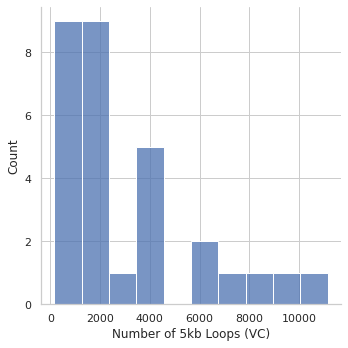

In [50]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
#fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.displot(loop_df, bins=10, x="Number of 5kb Loops (VC)")
loop_df["Number of 5kb Loops (VC)"].describe()

count      30.000000
mean     3716.933333
std      2112.698535
min      1156.000000
25%      2227.000000
50%      2863.500000
75%      4697.250000
max      8528.000000
Name: Number of 10kb Loops (VC), dtype: float64

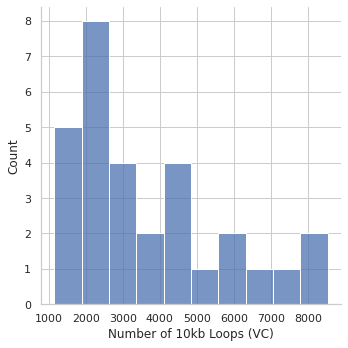

In [51]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
#fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.displot(loop_df, bins=10, x="Number of 10kb Loops (VC)")
loop_df["Number of 10kb Loops (VC)"].describe()

count      30.000000
mean     3304.133333
std       951.979308
min      1442.000000
25%      2830.250000
50%      3097.000000
75%      3797.000000
max      6606.000000
Name: Number of 25kb Loops (VC), dtype: float64

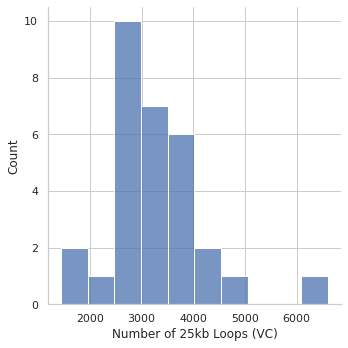

In [52]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
#fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.displot(loop_df, bins=10, x="Number of 25kb Loops (VC)")
loop_df["Number of 25kb Loops (VC)"].describe()

In [43]:
np.percentile(loop_df["Number of 5kb Loops (VC)"], [10, 25, 50, 75, 99])

array([  723.9 ,  1150.  ,  1589.5 ,  4092.  , 10648.72])

In [44]:
np.percentile(loop_df["Number of 10kb Loops (VC)"], [10, 25, 50, 70, 75, 99])

array([1737.9 , 2227.  , 2863.5 , 4632.2 , 4697.25, 8456.66])

In [45]:
np.percentile(loop_df["Number of 25kb Loops (VC)"], [10, 25, 50, 70, 75, 99])

array([2594.7 , 2830.25, 3097.  , 3633.3 , 3797.  , 6067.18])

In [46]:
loop_df.describe()

,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (VC),Number of 10kb Loops (VC),Number of 25kb Loops (VC)
count,3.000000e+01,3.000000e+01,30.000000,30.000000,30.000000
mean,3.038213e+08,1.341875e+08,3129.266667,3716.933333,3304.133333
std,1.746120e+08,7.167007e+07,2961.087463,2112.698535,951.979308
min,8.464760e+07,4.028421e+07,162.000000,1156.000000,1442.000000
25%,1.961061e+08,9.519680e+07,1150.000000,2227.000000,2830.250000
50%,2.681661e+08,1.102527e+08,1589.500000,2863.500000,3097.000000
75%,3.802163e+08,1.756080e+08,4092.000000,4697.250000,3797.000000
max,8.717512e+08,3.836813e+08,11151.000000,8528.000000,6606.000000


#### plot valid interaction pairs vs. number 25kb loops

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 25kb Loops (VC)'>

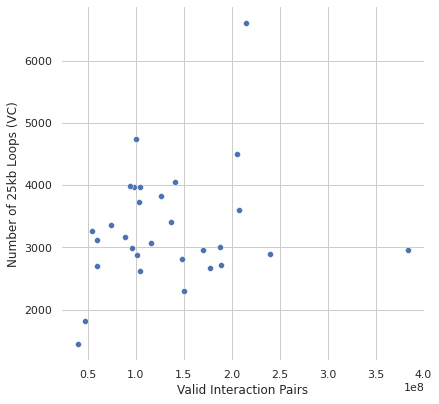

In [47]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 25kb Loops (VC)",
                data=loop_df,
                ax=ax)

#### plot valid interaction pairs vs. number 10kb loops

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 10kb Loops (VC)'>

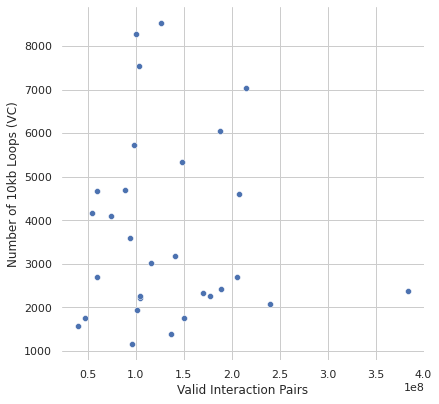

In [48]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 10kb Loops (VC)",
                data=loop_df,
                ax=ax,
                palette="pastel")

#### plot valid interaction pairs vs. number 5kb loops

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 5kb Loops (VC)'>

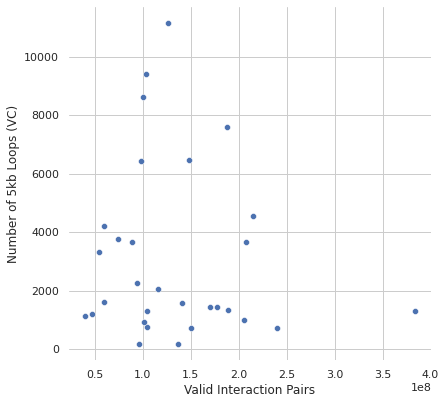

In [49]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 5kb Loops (VC)",
                data=loop_df,
                ax=ax,
                palette="pastel")

## Plotting Loops versus Valid Pairs using a Soft Threshold

In [33]:
soft_threshold = 2e8
soft_data = loop_df.loc[loop_df['Valid Interaction Pairs'] < soft_threshold]

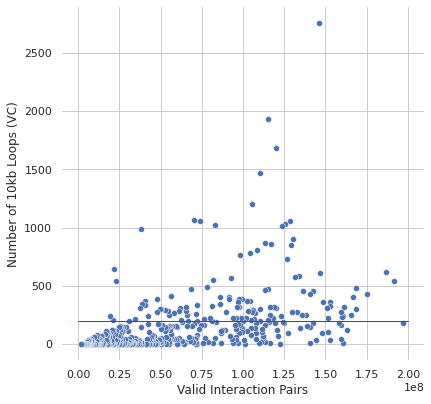

In [50]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

g = sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 10kb Loops (VC)",
                data=soft_data,
                ax=ax,
                palette="pastel"
                )
plt.plot([0, 2e8], [200, 200], linewidth=1, color="red")

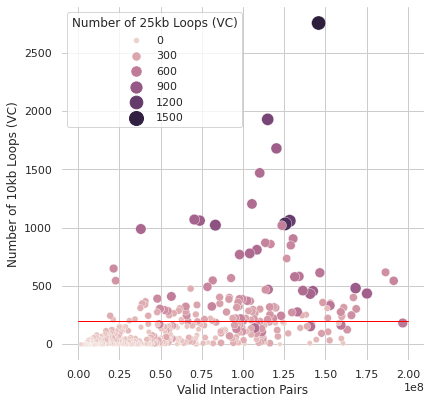

In [51]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

g = sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 10kb Loops (VC)",
                data=soft_data,
                ax=ax,
                hue="Number of 25kb Loops (VC)",
                size="Number of 25kb Loops (VC)",
                sizes=(20, 200)
                )
plt.plot([0, 2e8], [200, 200], linewidth=1, color="red")

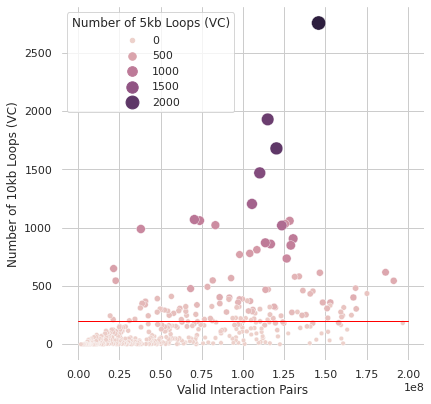

In [52]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

g = sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 10kb Loops (VC)",
                data=soft_data,
                ax=ax,
                hue="Number of 5kb Loops (VC)",
                size="Number of 5kb Loops (VC)",
                sizes=(20, 200)
                )
plt.plot([0, 2e8], [200, 200], linewidth=1, color="red")

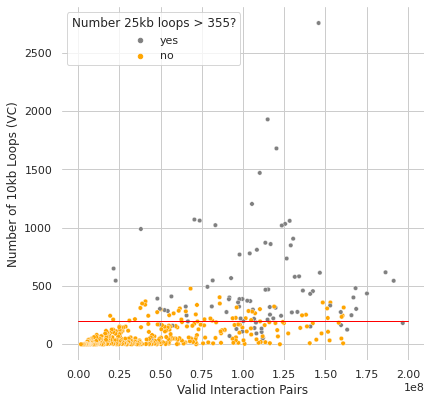

In [64]:
for index, row in soft_data.iterrows():
    if int(row['Number of 25kb Loops (VC)']) > 355:
        soft_data.at[index, 'Number 25kb loops > 355?'] = "yes"
    else:
        soft_data.at[index, 'Number 25kb loops > 355?'] = "no"

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

g = sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 10kb Loops (VC)",
                data=soft_data,
                ax=ax,
                hue="Number 25kb loops > 355?",
                size="Number 25kb loops > 355?",
                sizes=(20, 20),
                palette=["gray", "orange"]
                )
plt.plot([0, 2e8], [200, 200], linewidth=1, color="red")

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 10kb Loops (VC)'>

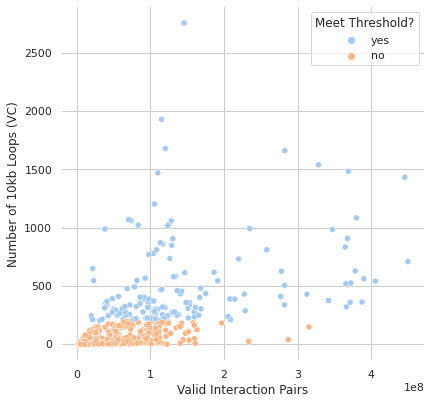

In [147]:
meet_thres = loop_df
for index, row in meet_thres.iterrows():
    if int(row['Number of 10kb Loops (VC)']) > 200:
        meet_thres.at[index, 'Meet Threshold?'] = "yes"
    else:
        meet_thres.at[index, 'Meet Threshold?'] = "no"
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 10kb Loops (VC)",
                data=loop_df,
                ax=ax,
                hue="Meet Threshold?",
                palette="pastel"
                )

In [67]:
for protein in loop_df.Protein.unique():
    print(protein, loop_df['Protein'].value_counts()[protein])


H3K27ac 97
SMC1A 19
CTCF 16
H3K4me3 9
RNA-Pol-II 1
Rad21 3
PR 1


In [54]:
h3k27ac = loop_df.loc[loop_df["Protein"] == "H3K27ac"]
ctcf = loop_df.loc[loop_df["Protein"] == "CTCF"]
smc1a = loop_df.loc[loop_df["Protein"] == "SMC1A"]
h3k4me3 = loop_df.loc[loop_df["Protein"] == "H3K4me3"]

count    9.000000e+00
mean     1.340780e+08
std      1.033192e+08
min      5.449411e+07
25%      7.403294e+07
50%      9.811437e+07
75%      1.698803e+08
max      3.836813e+08
Name: Valid Interaction Pairs, dtype: float64

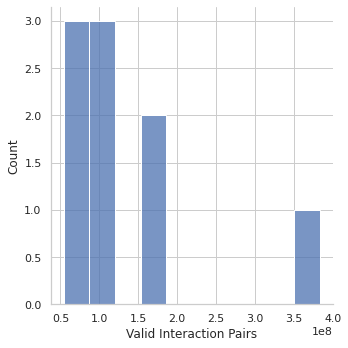

In [55]:
sns.displot(h3k27ac, bins=10, x="Valid Interaction Pairs")
h3k27ac["Valid Interaction Pairs"].describe()

count    2.000000e+00
mean     1.005748e+08
std      5.712815e+07
min      6.017906e+07
25%      8.037691e+07
50%      1.005748e+08
75%      1.207726e+08
max      1.409705e+08
Name: Valid Interaction Pairs, dtype: float64

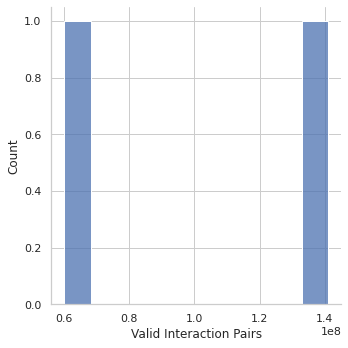

In [56]:
sns.displot(ctcf, bins=10, x="Valid Interaction Pairs")
ctcf["Valid Interaction Pairs"].describe()

count    7.000000e+00
mean     1.698155e+08
std      4.601935e+07
min      1.046466e+08
25%      1.332584e+08
50%      1.885015e+08
75%      2.069494e+08
max      2.151447e+08
Name: Valid Interaction Pairs, dtype: float64

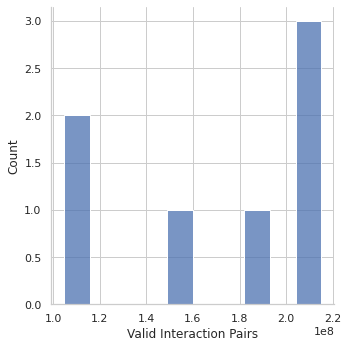

In [57]:
sns.displot(smc1a, bins=10, x="Valid Interaction Pairs")
smc1a["Valid Interaction Pairs"].describe()

count    5.000000e+00
mean     1.212663e+08
std      5.488275e+07
min      4.028421e+07
25%      1.033236e+08
50%      1.270055e+08
75%      1.479378e+08
max      1.877804e+08
Name: Valid Interaction Pairs, dtype: float64

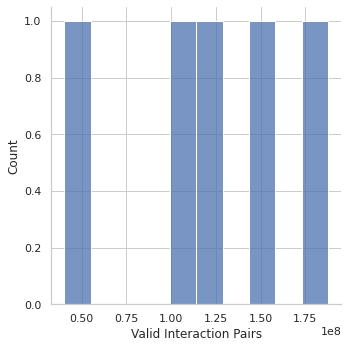

In [58]:
sns.displot(h3k4me3, bins=10, x="Valid Interaction Pairs")
h3k4me3["Valid Interaction Pairs"].describe()

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 5kb Loops (VC)'>

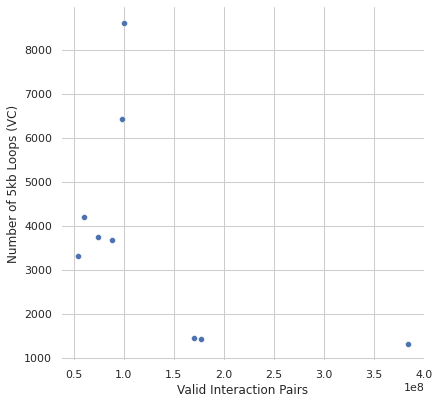

In [59]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 5kb Loops (VC)",
                data=h3k27ac,
                ax=ax,
                palette="pastel")

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 5kb Loops (VC)'>

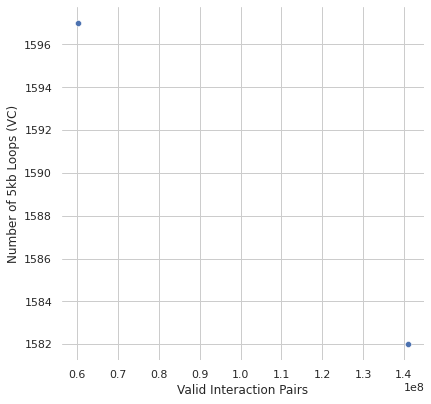

In [60]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 5kb Loops (VC)",
                data=ctcf,
                ax=ax,
                palette="pastel")

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 5kb Loops (VC)'>

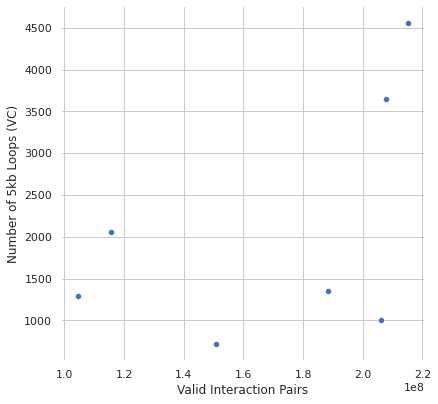

In [61]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 5kb Loops (VC)",
                data=smc1a,
                ax=ax,
                palette="pastel")

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 5kb Loops (VC)'>

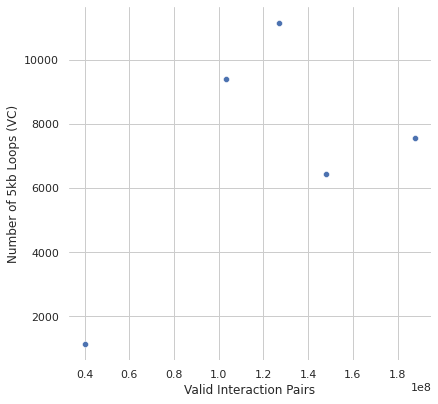

In [62]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 5kb Loops (VC)",
                data=h3k4me3,
                ax=ax,
                palette="pastel")

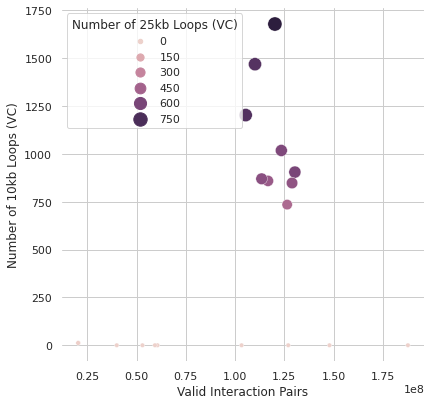

In [135]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

g = sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 10kb Loops (VC)",
                data=h3k4me3,
                ax=ax,
                hue="Number of 25kb Loops (VC)",
                size="Number of 25kb Loops (VC)",
                sizes=(20, 200)
                )

### Decided Threshold: >=50 10kb loops OR >=11 5kb loops

## Get Samples that Meet Threshold

In [148]:
meet_thres = meet_thres.sort_values(by=["Sample Name"], ascending=True).reset_index(drop=True)
meet_thres = meet_thres.loc[meet_thres['Meet Threshold?'] == "yes"].reset_index(drop=True)
meet_thres

,Sample Name,Protein,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (VC),Number of 10kb Loops (VC),Number of 25kb Loops (VC),Meet Threshold?
0,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b2,CTCF,171412471,65258210,191,323,448,yes
1,AoSMC.GSE178598.Homo_Sapiens.H3K27ac.b1,H3K27ac,337307006,191374595,402,544,526,yes
2,CAR-T-CD19-D10.GSE168881.Homo_Sapiens.H3K27ac.b1,H3K27ac,269649847,138186301,251,253,209,yes
3,CAR-T-HA-D10.GSE168881.Homo_Sapiens.H3K27ac.b1,H3K27ac,275256905,135793235,235,248,221,yes
4,CAR-T-HA-D10.GSE168881.Homo_Sapiens.H3K27ac.b2,H3K27ac,291474091,152952908,395,358,230,yes
5,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,H3K27ac,400231692,258102758,530,810,788,yes
6,CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,H3K27ac,148213169,62567313,191,212,124,yes
7,CUTLL1.GSE115896.Homo_Sapiens.H3K27ac.b1,H3K27ac,131679181,57916172,205,265,260,yes
8,Caudate.GSE147672.Homo_Sapiens.H3K27ac.b1,H3K27ac,277293410,131359807,306,578,665,yes
9,Caudate.GSE147672.Homo_Sapiens.H3K27ac.b2,H3K27ac,283390232,133973654,330,582,659,yes


In [149]:
print(len(meet_thres), 'samples meet threshold out of 486 samples', round(len(meet_thres)/486*100, 2), '%')

146 samples meet threshold out of 486 samples 30.04 %


In [150]:
#samplesheet = '/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/samplesheets/post-hicpro/current-post-hicpro-without-header.tsv'
new_samples = '/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/samplesheets/hicpro/2022.10.20.09.39.hicpro.samplesheet.without_header.tsv'
samples_to_run = []

index = 1
with open(new_samples) as ss:
    for line in ss:
        info = line.strip().split()
        sample = info[0]
        if(sample in meet_thres.values):
            samples_to_run.append(str(index))
        index += 1
print(','.join(samples_to_run))
print("length:", len(samples_to_run))

5,38,43,45,46,47,48,49,50,51,52,58,62,63,64,66,67,73,74,75,76,77,78,81,92,93,98,99,104,107,108,109,110,111,113,115,116,121,126,127,135,138,140,142,144,146,149,162,164,165,166,168,169,170,171,185,186,190,194,203,204,205,206,208,209,210,211,214,215,216,217,218,219,222,224,225,227,228,248,249,253,254,255,256,264,266,267,269,276,288,290,293,299,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,327,328,339,340,341,342,343,344,345,346,348,350,351,352,357,358,359,360,361,362,363,364,365,366,367,368,370,376,409,446,452
length: 146


# Check HiC-Pro and HiCCUPS Output Files for Pairs and Loop Information

#### generate loop df

In [39]:
thres1_loop_df = generate_loop_df()
thres1_loop_df.columns = ["Sample Name", "Total Pairs Processed", "Valid Interaction Pairs", "Number of 5kb Loops (all chrs)", "Number of 10kb Loops (all chrs)", "Number of 25kb Loops (all chrs)"]

#### sort df by sample name

In [40]:
thres1_loop_df = thres1_loop_df.sort_values(by=["Sample Name"], ascending=True).reset_index(drop=True)
thres1_loop_df.index += 1
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(thres1_loop_df)

,Sample Name,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (all chrs),Number of 10kb Loops (all chrs),Number of 25kb Loops (all chrs)
1,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,278154964,100153514,237,1174,2895
2,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b2,171412471,65258210,517,1741,3721
3,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b5,267255826,108090920,97,637,2523
4,A673_SA2r.GSE133227.Homo_Sapiens.CTCF.b1,264799171,106959156,124,794,2490
5,A673_WT.GSE133227.Homo_Sapiens.CTCF.b4,147524807,57203051,112,900,2645
6,A673_WT.GSE133227.Homo_Sapiens.CTCF.b5,258146361,99574452,102,570,2082
7,AoSMC.GSE178598.Homo_Sapiens.H3K27ac.b1,337307006,191374595,2999,4867,5199
8,Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1,691966559,151539207,242,1164,2133
9,CAR-T-CD19-D10.GSE168881.Homo_Sapiens.H3K27ac.b1,269649847,138186301,763,1306,1598
10,CAR-T-CD19-D10.GSE168881.Homo_Sapiens.H3K27ac.b2,277758441,138775067,577,1149,1846


#### sort df by number of 5kb loops, greatest to least

In [41]:
thres1_loop_df = thres1_loop_df.sort_values(by=["Number of 5kb Loops (all chrs)"], ascending=False).reset_index(drop=True)
thres1_loop_df.index += 1
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(thres1_loop_df)

,Sample Name,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (all chrs),Number of 10kb Loops (all chrs),Number of 25kb Loops (all chrs)
1,H9.GSE105028.Homo_Sapiens.Rad21.b1,515530130,145833436,27188,32829,20182
2,H9-HS.GSE105028.Homo_Sapiens.Rad21.b1,418316089,114952549,18958,22042,13067
3,THP-1-del-eIFIDR-Batch2.GSE149420.Homo_Sapiens.H3K4me3.b1,265050415,120253465,16454,17881,11818
4,THP-1-del-TRP-Batch2.GSE149420.Homo_Sapiens.H3K4me3.b1,285802803,105411101,14505,16820,11707
5,THP-1-del-cIDR-Batch2.GSE149420.Homo_Sapiens.H3K4me3.b1,267596749,110135040,13991,16775,10784
6,DND41.GSE165207.Homo_Sapiens.H3K27ac.b1,290786588,166936714,12997,12199,6861
7,THP-1-WT-Batch2.GSE149420.Homo_Sapiens.H3K4me3.b1,290788835,123517484,12419,14263,8278
8,THP-1-del-cIDR-Batch1.GSE149420.Homo_Sapiens.H3K4me3.b1,316000577,130392942,12057,13855,9520
9,DND41.GSE165207.Homo_Sapiens.H3K27ac.b2,256264966,148369570,11687,11443,6782
10,THP-1-WT-Batch1.GSE149420.Homo_Sapiens.H3K4me3.b1,252514040,116731209,11590,14299,9215


#### sort df by number of 10kb loops, greatest to least

In [42]:
thres1_loop_df = thres1_loop_df.sort_values(by=["Number of 10kb Loops (all chrs)"], ascending=False).reset_index(drop=True)
thres1_loop_df.index += 1
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(thres1_loop_df)

,Sample Name,Total Pairs Processed,Valid Interaction Pairs,Number of 5kb Loops (all chrs),Number of 10kb Loops (all chrs),Number of 25kb Loops (all chrs)
1,H9.GSE105028.Homo_Sapiens.Rad21.b1,515530130,145833436,27188,32829,20182
2,H9-HS.GSE105028.Homo_Sapiens.Rad21.b1,418316089,114952549,18958,22042,13067
3,THP-1-del-eIFIDR-Batch2.GSE149420.Homo_Sapiens.H3K4me3.b1,265050415,120253465,16454,17881,11818
4,THP-1-del-TRP-Batch2.GSE149420.Homo_Sapiens.H3K4me3.b1,285802803,105411101,14505,16820,11707
5,THP-1-del-cIDR-Batch2.GSE149420.Homo_Sapiens.H3K4me3.b1,267596749,110135040,13991,16775,10784
6,H9-HS-KI.GSE105028.Homo_Sapiens.Rad21.b1,199983939,38015306,6291,14321,12906
7,THP-1-WT-Batch1.GSE149420.Homo_Sapiens.H3K4me3.b1,252514040,116731209,11590,14299,9215
8,THP-1-WT-Batch2.GSE149420.Homo_Sapiens.H3K4me3.b1,290788835,123517484,12419,14263,8278
9,THP-1-del-cIDR-Batch1.GSE149420.Homo_Sapiens.H3K4me3.b1,316000577,130392942,12057,13855,9520
10,DND41.GSE165207.Homo_Sapiens.H3K27ac.b1,290786588,166936714,12997,12199,6861


#### plot loop data

count      190.000000
mean      2729.684211
std       3870.025054
min         25.000000
25%        504.750000
50%       1068.500000
75%       3577.500000
max      27188.000000
Name: Number of 5kb Loops (all chrs), dtype: float64

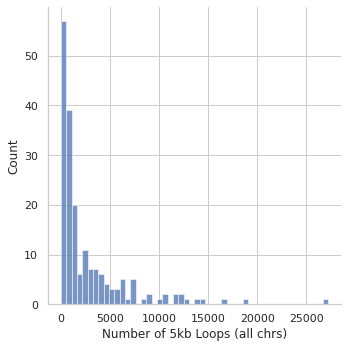

In [43]:
sns.displot(thres1_loop_df, bins=50, x="Number of 5kb Loops (all chrs)")
thres1_loop_df["Number of 5kb Loops (all chrs)"].describe()

count      190.00000
mean      4211.30000
std       4364.82147
min        120.00000
25%       1405.25000
50%       2577.50000
75%       5608.00000
max      32829.00000
Name: Number of 10kb Loops (all chrs), dtype: float64

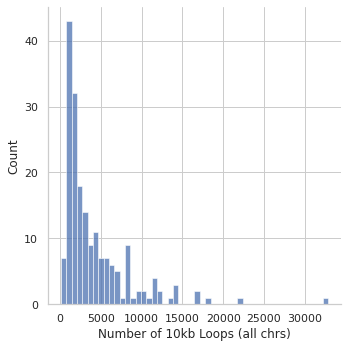

In [44]:
sns.displot(thres1_loop_df, bins=50, x="Number of 10kb Loops (all chrs)")
thres1_loop_df["Number of 10kb Loops (all chrs)"].describe()

count      190.000000
mean      4461.836842
std       2666.763292
min        253.000000
25%       2523.000000
50%       4116.500000
75%       5567.500000
max      20182.000000
Name: Number of 25kb Loops (all chrs), dtype: float64

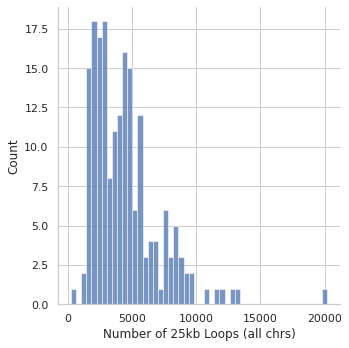

In [45]:
sns.displot(thres1_loop_df, bins=50, x="Number of 25kb Loops (all chrs)")
thres1_loop_df["Number of 25kb Loops (all chrs)"].describe()

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 5kb Loops (all chrs)'>

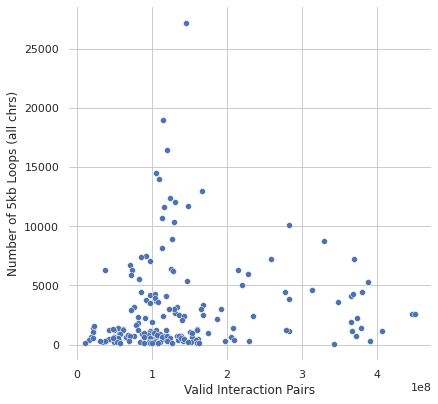

In [46]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 5kb Loops (all chrs)",
                data=thres1_loop_df,
                ax=ax)

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 10kb Loops (all chrs)'>

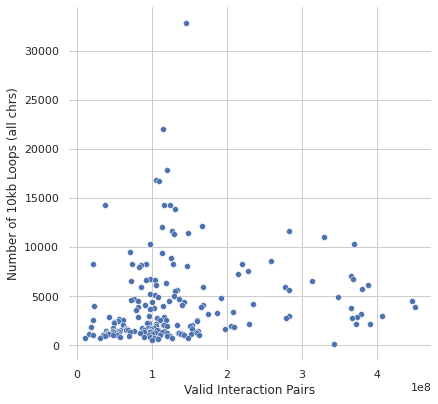

In [47]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 10kb Loops (all chrs)",
                data=thres1_loop_df,
                ax=ax)

<AxesSubplot:xlabel='Valid Interaction Pairs', ylabel='Number of 25kb Loops (all chrs)'>

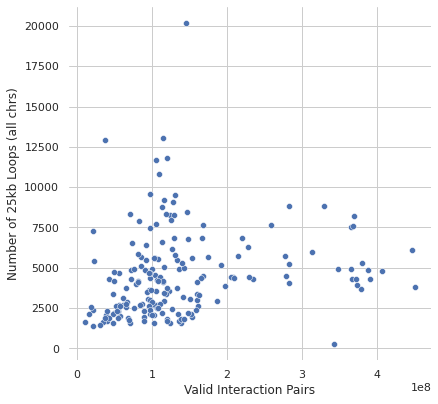

In [48]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x="Valid Interaction Pairs",
                y="Number of 25kb Loops (all chrs)",
                data=thres1_loop_df,
                ax=ax)

In [16]:
paths = glob.glob('results/loops/hiccups_vc/*.txt')

In [17]:
data = []
for path in paths:
    sample_data = []
    samples = []
    sample_name = path.split('/')[3].split('5000_')[0].split("_")[0]
    for path in paths:
        if sample_name in path:
            samples.append(path)
    normalization = path.split('/')[3].split('5000_')[0].split("_")[1]
    type_overlap = path.split('/')[3].split('5000_')[1].split('.')[0]
    
    sample_data.append(sample_name)
    
    with open(path) as f:
        lines = f.readlines()
        sample_data.append(len(lines))
    data.append(sample_data)
    
overlap_df = pd.DataFrame(data)  

In [20]:
cols = ["sample_name", "overlap_mode", "number_overlaps"]
overlap_df.columns = cols
overlap_df.sort_values(by="sample_name").reset_index(drop=True)

,sample_name,overlap_mode,number_overlaps
0,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b1_kr,both,7378
1,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b1_kr,either,10829
2,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b1_kr,neither,532
3,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b1_vc,both,5563
4,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b1_vc,either,8245
5,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b1_vc,neither,404
6,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b2_kr,both,6466
7,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b2_kr,neither,473
8,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b2_kr,either,9649
9,GM12878.GSE101498.Homo_Sapiens.H3K27ac.b2_vc,neither,380


<AxesSubplot:xlabel='sample_name', ylabel='number_overlaps'>

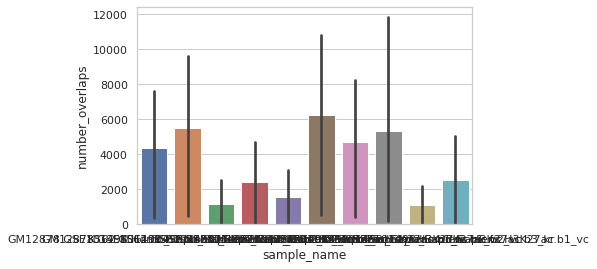

In [29]:
sns.barplot(data=overlap_df, x="sample_name", y = "number_overlaps")